## Introduction: Analysis of the House Sales Market in King County

## Imports

This is an inferential analysis, therefore it will heavily rely on statsmodels for statistical testing, modeling and analysis.

Below is a list of all the necessary imports:

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 


Load data: 

In [289]:
df = pd.read_csv('.\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [290]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## King County Dataset Column Descriptions

* **id:** Unique identifier for a house.
* **date:** Date house was sold.
* **price:** Sale price (prediction target).
* **bedrooms:** Number of bedrooms.
* **bathrooms:**  Number of bathrooms.
* **sqft_living:** Square footage of living space in the home.
* **sqft_lot:** Square footage of the lot.
* **floors:** Number of floors (levels) in house.
* **waterfront:** Whether the house is on a waterfront.
* **view:** Quality of view from house.
* **condition:** How good the overall condition of the house is. Related to maintenance of house
* **grade:** Overall grade of the house. Related to the construction and design of the house.
* **sqft_above:** Square footage of house apart from basement.
* **sqft_basement:** Square footage of the basement.
* **yr_built:** Year when house was built.
* **yr_renovated:** Year when house was renovated.
* **zipcode:** ZIP Code used by the United States Postal Service.
* **lat:** Latitude coordinate.
* **long:** Longitude coordinate.
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.


## EDA and Data Cleaning

Start with EDA to understand the DataFrame, identify inconsistencies and finally run a summary statistics which will determine how to rectify some of the inconsitencies.

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Rectify data types in the following columns:
* **id:** **integer to object*
* **bathrooms:** **float to integer*
* **floors:** **float to integer*
* **grade:** **object to integer*
* **sqft_basement:** **object to float*
* **yr_built:** **integer to object*
* **yr_renovated:** **float to object*
* **zipcode:** **integer to object*
* **lat:** **integer to object*
* **long:** **integer to object*

start with converting integers to objects ...

In [292]:
df = df.astype({
    'id': object,
    'yr_built': object,
    'zipcode': object,
    'lat': object,
    'long': object,
    'yr_renovated': object
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  object 
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  object 
 15  yr_renovated   17755 non-null  object 
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  object 
 18  long  

proceed to converting floats to the nearest integer ...

In [293]:
floats_to_integers = ['bathrooms', 'floors']
df[floats_to_integers] = df[floats_to_integers].round().astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  object 
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  int32  
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int32  
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  object 
 15  yr_renovated   17755 non-null  object 
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  object 
 18  long  

In [294]:
# Extract integers from grade 
df['grade'] = df['grade'].str.extract('(\d+)').astype(int)

#convert date to object
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  object        
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  int32         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  object        
 15  yr_renovated   1775

In [295]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,NaN,NONE,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,NO,NONE,...,7,2170,400.0,1951,1991.0,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,NO,NONE,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,NO,NONE,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,NO,NONE,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


All the data types are correctly rectified. 

Proceed to eliminating duplicates if there is any ...

In [296]:
df.duplicated().sum()

0

There are no duplicates, so get the df shape summary ...

In [297]:
df.shape

(21597, 21)

* **No. of Rows:** 21597 rows present in the DataFrame.
* **No. of Columns:** 21 columns (variables) present in the DataFrame.

Describe the dataframe to get a clear idea of the data distribution.

In [298]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_living15,sqft_lot15
count,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,7.657915,1788.596842,1986.620318,12758.283512
min,2014-05-02 00:00:00,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,7.000000,1560.000000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,8.000000,2210.000000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,6210.000000,871200.000000
std,NaN,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,1.173200,827.759761,685.230472,27274.441950


Check for null values in the entire df ...

In [299]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Look at the entries of the objects with null, to decide on the best solution for the NaaNs in these columns ...

In [300]:
waterfront_count = df['waterfront'].value_counts()
waterfront_count

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [301]:
view_count = df['view'].value_counts()
view_count

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [302]:
yr_renovated_count = df['yr_renovated'].value_counts()
yr_renovated_count 

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

* **waterfront:** Replace NaN with 'UNKNOWN'.
* **view:** Replace NaN with 'UNRATED".
* **yr_renovated:** Insufficient data, so drop column.

In [303]:
df['waterfront'] = df['waterfront'].fillna('UNKNOWN')
df['view'] = df['view'].fillna('UUNRATED')
df = df.drop(columns=['yr_renovated'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  object        
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  int32         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  object        
 15  zipcode        2159

The data is now consistent.

## Pair plot

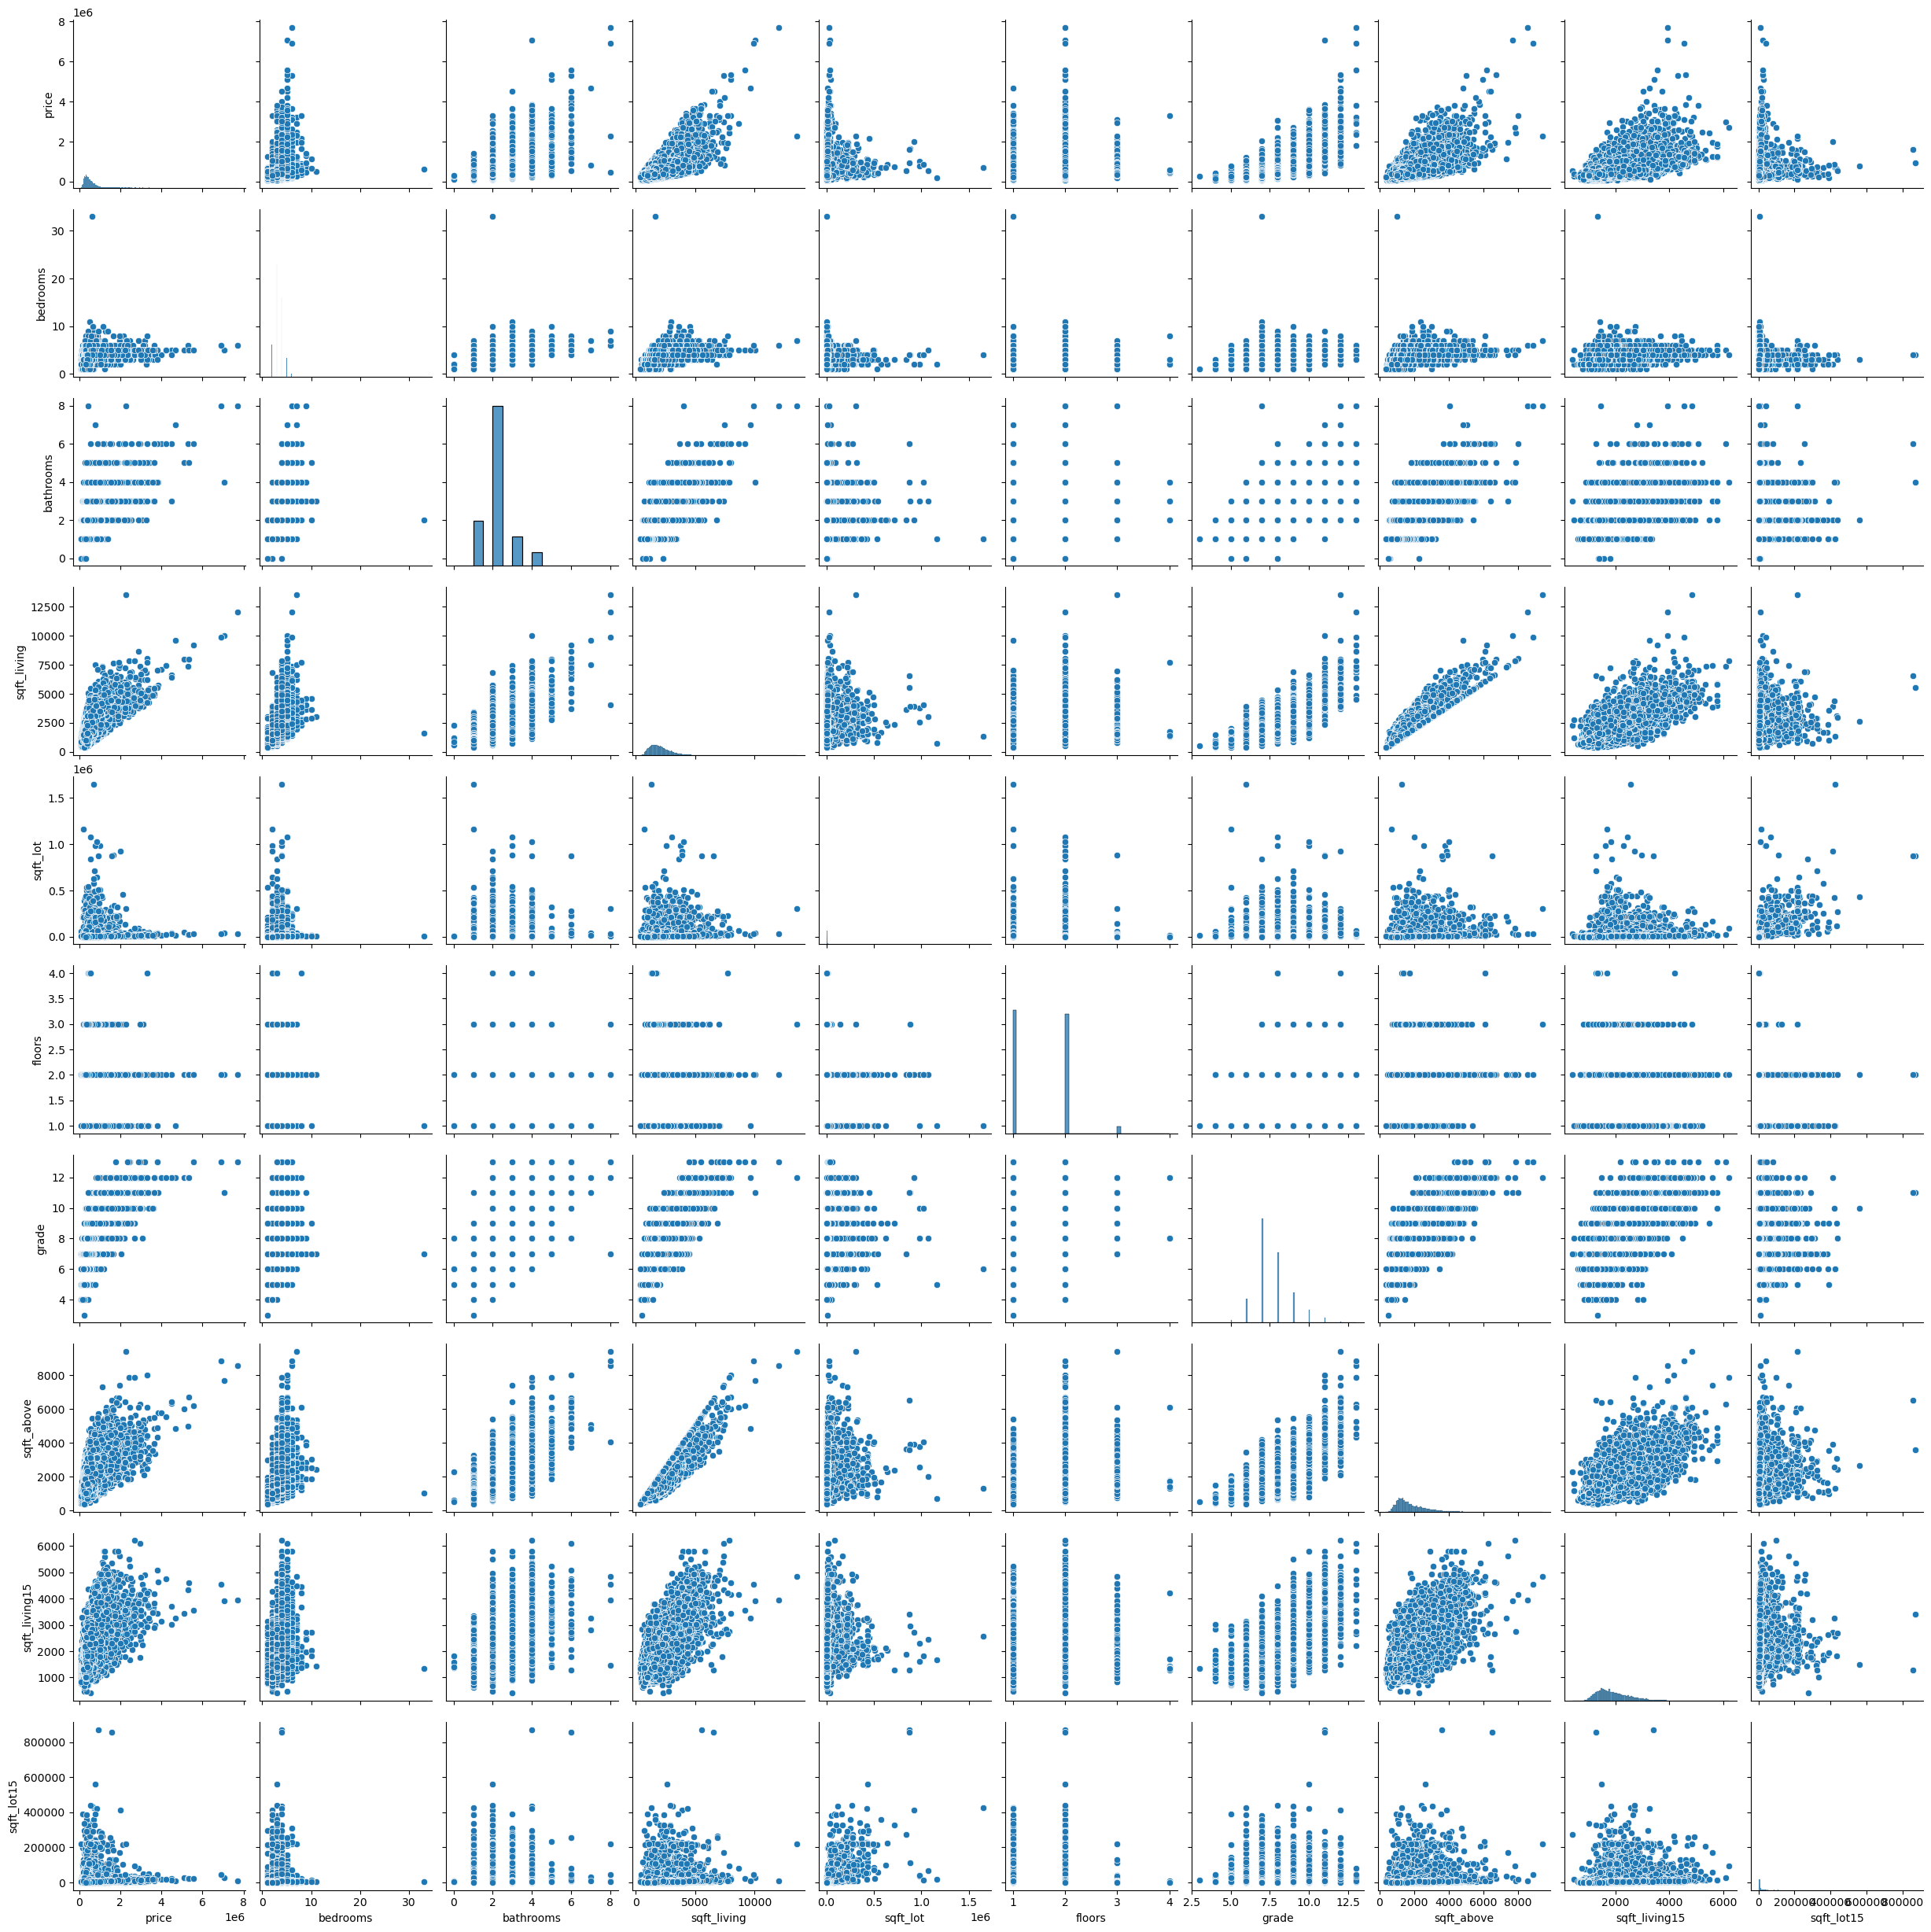

In [304]:
numeric_df = df.select_dtypes(include='number')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    sns.pairplot(numeric_df)


## Correlation Matrix

In [305]:
numeric_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.519628,0.701917,0.089876,0.244832,0.667951,0.605368,0.585241,0.082845
bedrooms,0.308787,1.000000,0.487955,0.578212,0.032471,0.180246,0.356563,0.479386,0.393406,0.030690
bathrooms,0.519628,0.487955,1.000000,0.702719,0.090532,0.327893,0.591830,0.600458,0.498534,0.087931
sqft_living,0.701917,0.578212,0.702719,1.000000,0.173453,0.321904,0.762779,0.876448,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.090532,0.173453,1.000000,-0.001542,0.114731,0.184139,0.144763,0.718204
floors,0.244832,0.180246,0.327893,0.321904,-0.001542,1.000000,0.408142,0.488437,0.242887,-0.010322
grade,0.667951,0.356563,0.591830,0.762779,0.114731,0.408142,1.000000,0.756073,0.713867,0.120981
sqft_above,0.605368,0.479386,0.600458,0.876448,0.184139,0.488437,0.756073,1.000000,0.731767,0.195077
sqft_living15,0.585241,0.393406,0.498534,0.756402,0.144763,0.242887,0.713867,0.731767,1.000000,0.183515
sqft_lot15,0.082845,0.030690,0.087931,0.184342,0.718204,-0.010322,0.120981,0.195077,0.183515,1.000000


## Correlation Heatmap

<Axes: >

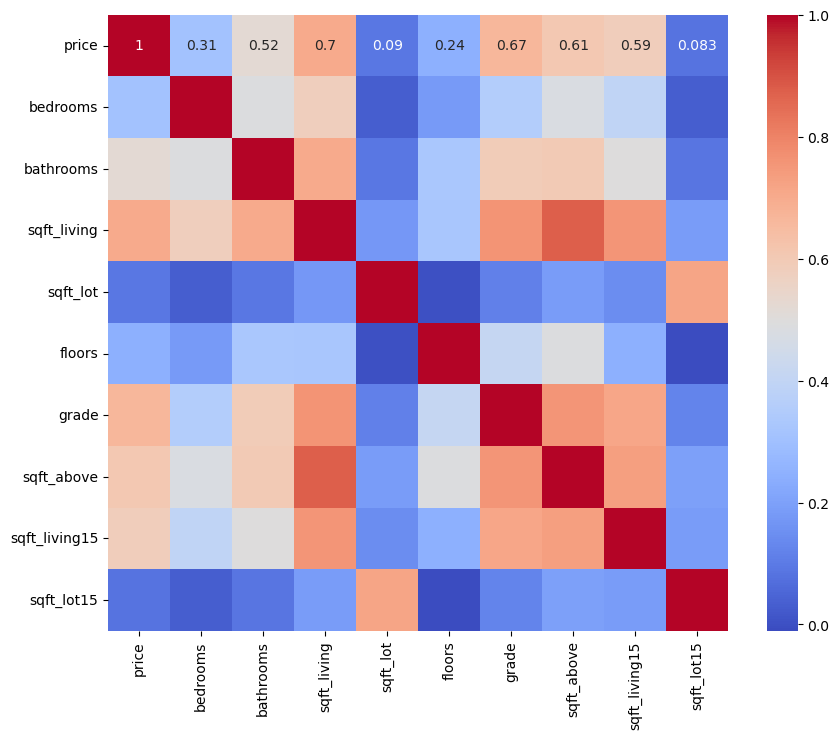

In [306]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(),cmap='coolwarm',annot=True)
